In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd
from glob import glob

In [2]:


file_paths = glob("C:/Users/yoyo/Nanyang Technological University/FYP_wang xiaoni/Site 02 - 00 - NTU - N3.2-B02-01m - Origin Node/*.csv")

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_csv(file_path, header = None)
    merged_data = pd.concat([merged_data, data], ignore_index=True)

merged_data.to_csv("merged_data.csv", index=False)


In [3]:
df = merged_data

In [4]:
temp_time = df[[5, 7, 9, 13, 15, 17]]
column_mapping = {
    5: 'year',
    7: 'month',
    9: 'day',
    13: 'hour',
    15: 'minute',
    17: 'second',
}

temp_time.rename(columns=column_mapping, inplace=True)


In [5]:
datetime_series = pd.to_datetime(temp_time)
df['datetime'] = datetime_series

In [6]:
columns_to_drop = [4, 5, 6, 7, 8,9,12,13,14,15,16,17]  

df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df

,0,1,2,3,10,11,18,19,20,21,...,57,58,59,60,61,62,63,64,65,datetime
0,tick,185628,unix_time,1683763200,Day_of_Week,Thursday,Pressure,100.69,kPa,BARO_Temperature,...,41.83,uT,magnetometer_y,2.84,uT,magnetometer_z,2.17,uT,NaN,2023-05-11 00:00:00
1,tick,185629,unix_time,1683763201,Day_of_Week,Thursday,Pressure,100.69,kPa,BARO_Temperature,...,41.77,uT,magnetometer_y,3.19,uT,magnetometer_z,1.18,uT,NaN,2023-05-11 00:00:01
2,tick,185630,unix_time,1683763202,Day_of_Week,Thursday,Pressure,100.68,kPa,BARO_Temperature,...,41.11,uT,magnetometer_y,2.88,uT,magnetometer_z,1.79,uT,NaN,2023-05-11 00:00:02
3,tick,185631,unix_time,1683763204,Day_of_Week,Thursday,Pressure,100.68,kPa,BARO_Temperature,...,42.00,uT,magnetometer_y,2.60,uT,magnetometer_z,1.86,uT,NaN,2023-05-11 00:00:04
4,tick,185632,unix_time,1683763205,Day_of_Week,Thursday,Pressure,100.69,kPa,BARO_Temperature,...,41.28,uT,magnetometer_y,2.97,uT,magnetometer_z,2.67,uT,NaN,2023-05-11 00:00:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304613,tick,1490241,unix_time,1685318394,Day_of_Week,Sunday,Pressure,100.74,kPa,BARO_Temperature,...,41.98,uT,magnetometer_y,7.08,uT,magnetometer_z,6.01,uT,NaN,2023-05-28 23:59:54
1304614,tick,1490242,unix_time,1685318395,Day_of_Week,Sunday,Pressure,100.73,kPa,BARO_Temperature,...,41.98,uT,magnetometer_y,6.70,uT,magnetometer_z,5.00,uT,NaN,2023-05-28 23:59:55
1304615,tick,1490243,unix_time,1685318396,Day_of_Week,Sunday,Pressure,100.72,kPa,BARO_Temperature,...,41.88,uT,magnetometer_y,6.48,uT,magnetometer_z,3.98,uT,NaN,2023-05-28 23:59:56
1304616,tick,1490244,unix_time,1685318398,Day_of_Week,Sunday,Pressure,100.73,kPa,BARO_Temperature,...,42.02,uT,magnetometer_y,6.58,uT,magnetometer_z,5.83,uT,NaN,2023-05-28 23:59:58


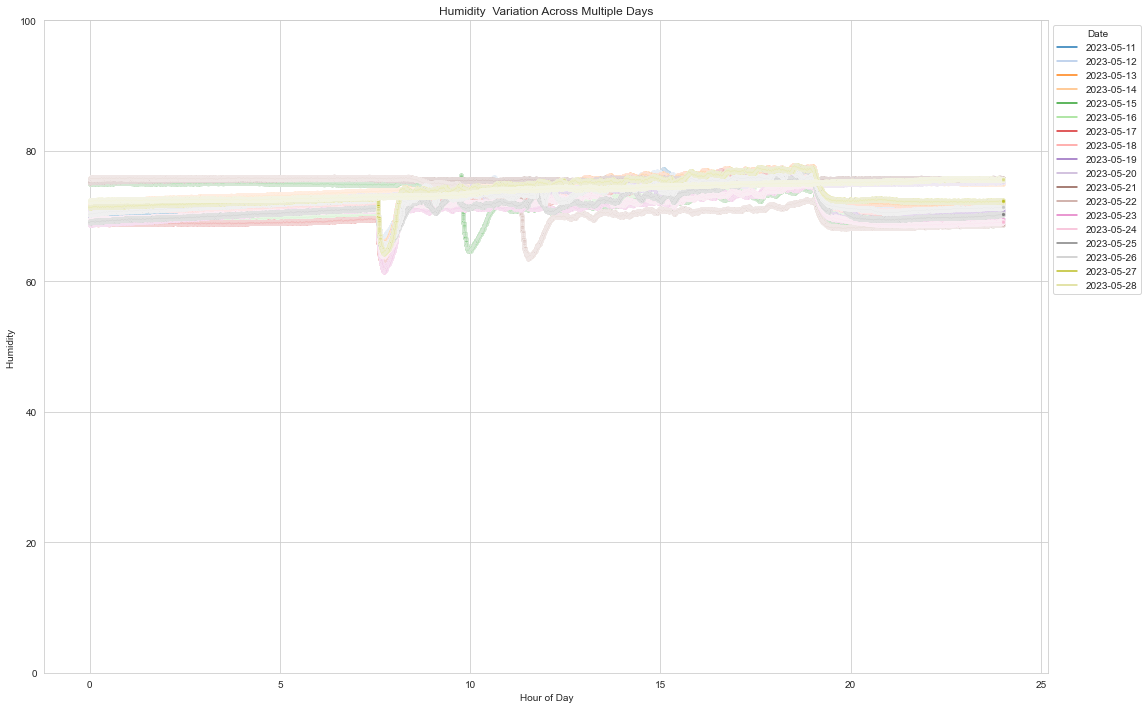

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df['date'] = df['datetime'].dt.date

sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

sns.lineplot(data=df, x=df['datetime'].dt.hour + df['datetime'].dt.minute / 60 + df['datetime'].dt.second / 3600,
             y=df[28], hue='date', palette='tab20', alpha=0.4, marker='o', markersize=4, linewidth=0.7)

plt.xlabel('Hour of Day')
plt.ylabel('Humidity ')
plt.title('Humidity  Variation Across Multiple Days')
plt.grid(True)
plt.legend(title='Date', bbox_to_anchor=(1, 1))
plt.ylim(0, 100)  # 
plt.show()


In [9]:

column_mapping = {
    1: 'tick',
    3: 'unix_time',
    11: 'Day_of_Week',
    19: 'Pressure',
    22: 'BARO_Temperature',
    25: 'Temperature',
    28: 'Humidity',
    31: 'APDS9960_proximity',
    33: 'APDS9960_red',
    35: 'APDS9960_green',
    37: 'APDS9960_blue',
    39: 'accel_x',
    42: 'accel_y',
    45: 'accel_z',
    48: 'gyro_x',
    51: 'gyro_y',
    54: 'gyro_z',
    57: 'magnetometer_x',
    60: 'magnetometer_y',
    63: 'magnetometer_z',
}

df.rename(columns=column_mapping, inplace=True)
columns_to_drop = [0,2,10,18,20,21,23,24,26,27,29,30,32,34,36,38,40,41,43,44,46,47,49,50,52,53,55,56,58,59,61,62,64,65]  

df.drop(columns=columns_to_drop, inplace=True)

In [17]:
sundays_data = df[df['datetime'].dt.day_name() == 'Sunday']
sundays_data = pd.concat([sundays_data, df[df['datetime'].dt.day == 20]])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5) & (df['datetime'].dt.day != 20)]


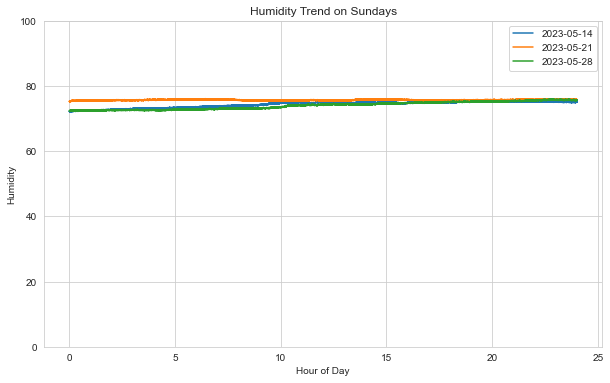

In [11]:
import matplotlib.pyplot as plt
import pandas as pd



df['datetime'] = pd.to_datetime(df['datetime'])

sundays_data = df[df['datetime'].dt.weekday == 6]  

plt.figure(figsize=(10, 6))

for date, group in sundays_data.groupby(sundays_data['datetime'].dt.date):
    plt.plot(group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600,
             group['Humidity'], label=date)

plt.xlabel('Hour of Day')
plt.ylabel('Humidity')
plt.title('Humidity Trend on Sundays')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)  
plt.show()


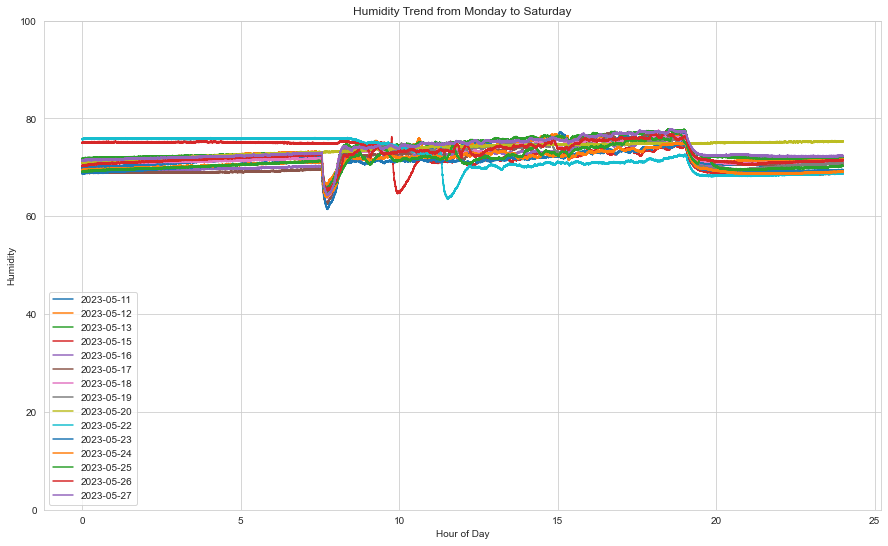

In [12]:
import matplotlib.pyplot as plt
import pandas as pd



df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

plt.figure(figsize=(15, 9))

for date, group in mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date):
    plt.plot(group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600,
             group['Humidity'], label=date)

plt.xlabel('Hour of Day')
plt.ylabel('Humidity')
plt.title('Humidity Trend from Monday to Saturday')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)  
plt.show()



In [35]:
mon_to_sat_data.columns


Index(['tick', 'unix_time', 'Day_of_Week', 'Pressure', 'BARO_Temperature',
       'Temperature', 'Humidity', 'APDS9960_proximity', 'APDS9960_red',
       'APDS9960_green', 'APDS9960_blue', 'accel_x', 'accel_y', 'accel_z',
       'gyro_x', 'gyro_y', 'gyro_z', 'magnetometer_x', 'magnetometer_y',
       'magnetometer_z', 'datetime', 'date'],
      dtype='object')

In [65]:


df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    for date, group in mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date):
        x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
        y = group['Humidity']

        poly_features = PolynomialFeatures(degree=n)  # Varying degree
        x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

        model = LinearRegression()
        model.fit(x_poly, y)

        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        rmse = sqrt(mse)

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)
        rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	3.5191	1.4506	0.2207	1.8258
2	2.3848	1.0055	0.4832	1.4952
3	1.7880	0.8315	0.6133	1.2943
4	1.7247	0.8400	0.6238	1.2718
5	1.4386	0.7671	0.6911	1.1579
6	1.2719	0.6538	0.7218	1.0922
7	1.2537	0.6481	0.7250	1.0845
8	1.2092	0.6276	0.7312	1.0653
9	1.0764	0.5837	0.7604	1.0053
10	1.0165	0.5502	0.7745	0.9766
11	1.0041	0.5662	0.7770	0.9707
12	0.9634	0.5446	0.7868	0.9513
13	1.0334	0.5782	0.7688	0.9917
14	0.9992	0.5651	0.7770	0.9769
15	0.9986	0.5577	0.7774	0.9782
16	1.0069	0.5541	0.7752	0.9840
17	1.0058	0.5528	0.7747	0.9854
18	1.1732	0.6571	0.7390	1.0687
19	1.2906	0.7159	0.7147	1.1211
20	1.4123	0.7735	0.6902	1.1724
21	1.5260	0.8241	0.6679	1.2178
22	1.6263	0.8660	0.6487	1.2558
23	1.7132	0.8987	0.6326	1.2873
24	1.7892	0.9240	0.6187	1.3137
25	1.8570	0.9437	0.6064	1.3365
26	1.9192	0.9602	0.5951	1.3570
27	1.9768	0.9767	0.5845	1.3756
28	2.0317	0.9943	0.5742	1.3933
29	2.0872	1.0141	0.5640	1.4107
30	2.4479	1.1771	0.4885	1.5274
31	2.5483	1.2117	0.4660	1.5598
32	2.7

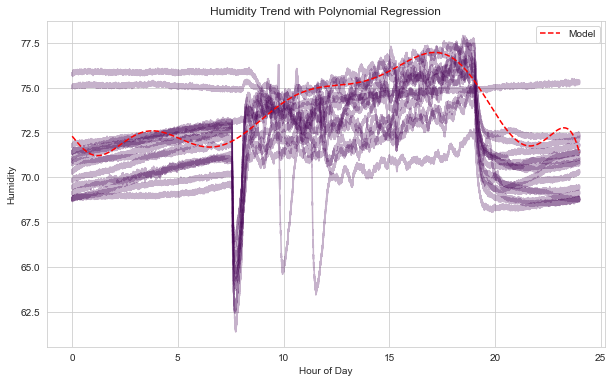

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap


df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

plt.figure(figsize=(10, 6))

cmap = get_cmap('viridis', len(mon_to_sat_data))

for i, (date, group) in enumerate(mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date)):
    x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
    y = group['Humidity']
    
    plt.plot(x, y, color=cmap(i), alpha=0.3)

poly_features = PolynomialFeatures(degree=11)  # 
x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

model = LinearRegression()
model.fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 1000)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

plt.plot(x_range, model.predict(x_range_poly), linestyle='dashed', color='red', label='Model')

plt.xlabel('Hour of Day')
plt.ylabel('Humidity')
# plt.ylim(0, 100)
# plt.ylim(90, 110)

plt.title('Humidity Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


# Temperature 

In [20]:


df['datetime'] = pd.to_datetime(df['datetime'])


mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    for date, group in mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date):
        x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
        y = group['BARO_Temperature']

        poly_features = PolynomialFeatures(degree=n)  # Varying degree
        x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

        model = LinearRegression()
        model.fit(x_poly, y)

        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        rmse = sqrt(mse)

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)
        rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

best_n_index_temperature = np.argmax(r2_list)
best_n_temperature = n_values[best_n_index_temperature]

print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n_temperature}")


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	2.0362	1.3331	0.2151	1.4262
2	0.9829	0.8162	0.6284	0.9849
3	0.4936	0.5471	0.8110	0.7013
4	0.3597	0.4695	0.8641	0.5953
5	0.3176	0.4236	0.8775	0.5629
6	0.3149	0.4218	0.8784	0.5605
7	0.2455	0.3680	0.9057	0.4948
8	0.2410	0.3629	0.9073	0.4903
9	0.1618	0.2716	0.9388	0.3998
10	0.1542	0.2664	0.9412	0.3914
11	0.1441	0.2465	0.9451	0.3783
12	0.1507	0.2500	0.9424	0.3871
13	0.1774	0.2785	0.9320	0.4205
14	0.1962	0.3028	0.9242	0.4423
15	0.1931	0.2922	0.9254	0.4390
16	0.1926	0.2946	0.9256	0.4385
17	0.2188	0.3184	0.9153	0.4674
18	0.5744	0.5820	0.7743	0.7513
19	0.7087	0.6693	0.7216	0.8337
20	0.8368	0.7442	0.6718	0.9065
21	0.9543	0.8083	0.6266	0.9696
22	1.0593	0.8629	0.5865	1.0233
23	1.1520	0.9068	0.5515	1.0687
24	1.2334	0.9425	0.5209	1.1070
25	1.3051	0.9716	0.4940	1.1396
26	1.3694	0.9963	0.4701	1.1679
27	1.4270	1.0144	0.4486	1.1926
28	1.4818	1.0305	0.4281	1.2156
29	1.5334	1.0579	0.4090	1.2367
30	1.7985	1.1913	0.3100	1.3393
31	1.8548	1.2173	0.2888	1.3600
32	2.0

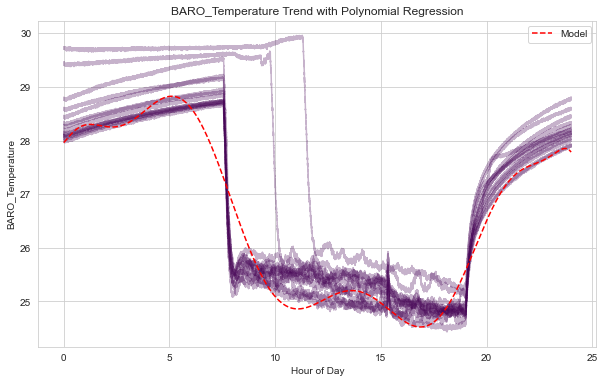

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap


df['datetime'] = pd.to_datetime(df['datetime'])


plt.figure(figsize=(10, 6))

cmap = get_cmap('viridis', len(mon_to_sat_data))

for i, (date, group) in enumerate(mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date)):
    x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
    y = group['BARO_Temperature']
    
    plt.plot(x, y, color=cmap(i), alpha=0.3)

poly_features = PolynomialFeatures(degree=11)  
x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

model = LinearRegression()
model.fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 1000)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

plt.plot(x_range, model.predict(x_range_poly), linestyle='dashed', color='red', label='Model')

plt.xlabel('Hour of Day')
plt.ylabel('BARO_Temperature')
plt.title('BARO_Temperature Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


# Humidity

In [22]:


df['datetime'] = pd.to_datetime(df['datetime'])


mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    for date, group in mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date):
        x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
        y = group['Humidity']

        poly_features = PolynomialFeatures(degree=n)  # Varying degree
        x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

        model = LinearRegression()
        model.fit(x_poly, y)

        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        rmse = sqrt(mse)

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)
        rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

best_n_index_temperature = np.argmax(r2_list)
best_n_temperature = n_values[best_n_index_temperature]

print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n_temperature}")


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	3.7618	1.5333	0.1704	1.9313
2	2.5544	1.0713	0.4468	1.5945
3	1.9149	0.8849	0.5862	1.3793
4	1.8474	0.8950	0.5973	1.3563
5	1.5408	0.8170	0.6694	1.2344
6	1.3623	0.6959	0.7022	1.1644
7	1.3428	0.6898	0.7056	1.1563
8	1.2951	0.6681	0.7123	1.1360
9	1.1529	0.6212	0.7436	1.0718
10	1.0887	0.5854	0.7586	1.0412
11	1.0754	0.6025	0.7613	1.0349
12	1.0317	0.5788	0.7719	1.0133
13	1.1045	0.6096	0.7540	1.0488
14	1.0669	0.5941	0.7634	1.0304
15	1.0650	0.5845	0.7646	1.0293
16	1.0724	0.5784	0.7631	1.0330
17	1.0695	0.5744	0.7637	1.0317
18	1.2395	0.6764	0.7312	1.1097
19	1.3620	0.7369	0.7073	1.1626
20	1.4891	0.7964	0.6831	1.2147
21	1.6076	0.8486	0.6612	1.2605
22	1.7120	0.8916	0.6426	1.2989
23	1.8021	0.9249	0.6272	1.3303
24	1.8806	0.9504	0.6141	1.3566
25	1.9505	0.9699	0.6026	1.3791
26	2.0146	0.9866	0.5921	1.3994
27	2.0740	1.0023	0.5822	1.4178
28	2.1306	1.0199	0.5726	1.4353
29	2.1879	1.0400	0.5631	1.4526
30	2.5634	1.2082	0.4888	1.5714
31	2.6694	1.2444	0.4658	1.6052
32	2.8

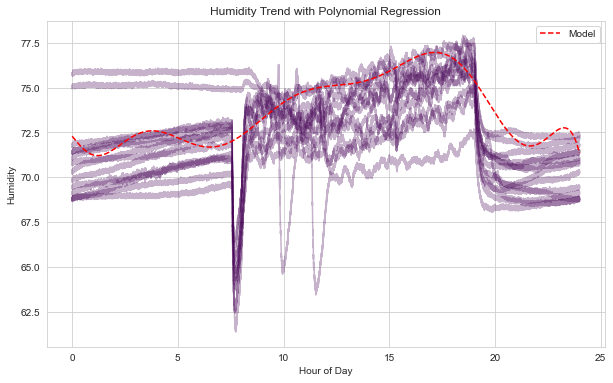

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap


df['datetime'] = pd.to_datetime(df['datetime'])


plt.figure(figsize=(10, 6))

cmap = get_cmap('viridis', len(mon_to_sat_data))

for i, (date, group) in enumerate(mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date)):
    x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
    y = group['Humidity']
    
    plt.plot(x, y, color=cmap(i), alpha=0.3)

poly_features = PolynomialFeatures(degree=11)  
x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

model = LinearRegression()
model.fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 1000)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

plt.plot(x_range, model.predict(x_range_poly), linestyle='dashed', color='red', label='Model')

plt.xlabel('Hour of Day')
plt.ylabel('Humidity')
plt.title('Humidity Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=12), LinearRegression())

scores = cross_val_score(model, x_poly, y, cv=5)  # cv=5 specifies 5-fold cross-validation
print(scores)

[nan nan nan nan nan]


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

y_pred = cross_val_predict(model, x_poly, y, cv=5)

residuals = y - y_pred

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(y, y_pred)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

cv_scores = cross_val_score(model, x_poly, y, cv=5)
print("Cross-validation scores:", cv_scores)
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.xlabel('Cross-validation folds')
plt.ylabel('R-squared')
plt.title('Cross-validation Results')

plt.tight_layout()
plt.show()


MemoryError: Unable to allocate 2.18 TiB for an array with shape (57627, 5200300) and data type float64

In [ ]:
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Pressure'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Pressure'].values

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    poly_features = PolynomialFeatures(degree=n)
    x_poly = poly_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")

# Fit the model with the best degree
poly_features = PolynomialFeatures(degree=best_n)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# Print the model parameters
print("Model Parameters:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Create a color map
cmap = get_cmap('viridis', len(sundays_data_grouped))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=range(len(sundays_data_grouped)), cmap=cmap, label='Data', s=50)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

y_pred = model.predict(x_range_poly)
plt.plot(x_range, y_pred, linestyle='dashed', color='red', label=f'Model (Degree {best_n})')

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Average Pressure Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


# Ridge 

In [ ]:
# sunday 

Evaluation Metrics:
Alpha	MSE		MAE		R^2		RMSE
0.000100	0.0234	0.1479	-0.0775	0.1529
0.000146	0.0234	0.1479	-0.0775	0.1529
0.000212	0.0234	0.1479	-0.0775	0.1529
0.000309	0.0234	0.1479	-0.0775	0.1529
0.000450	0.0234	0.1479	-0.0775	0.1529
0.000655	0.0234	0.1479	-0.0775	0.1529
0.000954	0.0234	0.1479	-0.0775	0.1529
0.001389	0.0234	0.1479	-0.0775	0.1529
0.002024	0.0234	0.1479	-0.0775	0.1529
0.002947	0.0234	0.1479	-0.0775	0.1529
0.004292	0.0234	0.1479	-0.0775	0.1529
0.006251	0.0234	0.1479	-0.0775	0.1529
0.009103	0.0234	0.1479	-0.0775	0.1529
0.013257	0.0234	0.1479	-0.0775	0.1529
0.019307	0.0234	0.1479	-0.0775	0.1529
0.028118	0.0234	0.1479	-0.0775	0.1529
0.040949	0.0234	0.1479	-0.0775	0.1529
0.059636	0.0234	0.1479	-0.0775	0.1529
0.086851	0.0234	0.1479	-0.0775	0.1529
0.126486	0.0234	0.1479	-0.0775	0.1529
0.184207	0.0234	0.1479	-0.0775	0.1529
0.268270	0.0234	0.1479	-0.0774	0.1529
0.390694	0.0234	0.1479	-0.0774	0.1529
0.568987	0.0234	0.1479	-0.0774	0.1529
0.828643	0.0234	0.1479	-0.0774	0.1529
1.20

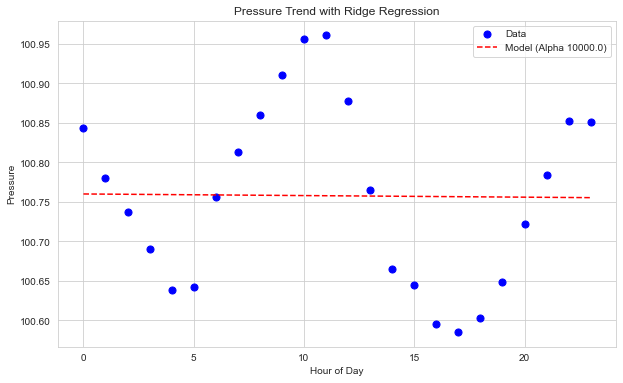

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the data for Sundays for three days and group by hour
sundays_data = df[df['datetime'].dt.dayofweek == 6]  # Assuming Sunday is the day of interest
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Pressure'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Pressure'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

alphas = np.logspace(-4, 4, 50)  # Generate a range of alpha values

for alpha in alphas:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    # Perform Ridge regression
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mse)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best alpha based on a chosen metric (e.g., R^2)
best_alpha_index = np.argmax(r2_list)
best_alpha = alphas[best_alpha_index]

# Print evaluation metrics and best alpha
print("Evaluation Metrics:")
print(f"Alpha\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, alpha in enumerate(alphas):
    print(f"{alpha:.6f}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest alpha:")
print(f"Best alpha value: {best_alpha}")

# Fit the final Ridge model with the best alpha
final_model = Ridge(alpha=best_alpha)
final_model.fit(x, y)

# Plot the results
plt.figure(figsize=(10, 6))

plt.scatter(x, y, c='blue', label='Data', s=50)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_pred = final_model.predict(x_range)

plt.plot(x_range, y_pred, linestyle='dashed', color='red', label=f'Model (Alpha {best_alpha})')

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend with Ridge Regression')
plt.legend()
plt.grid(True)

plt.show()


Training MSE: 0.005044264100469285
Testing MSE: 0.014239938731248385
Training MAE: 0.05651733911396437
Testing MAE: 0.09911911151738764
Training R^2: 0.5103048142528313
Testing R^2: 0.34376638926726777


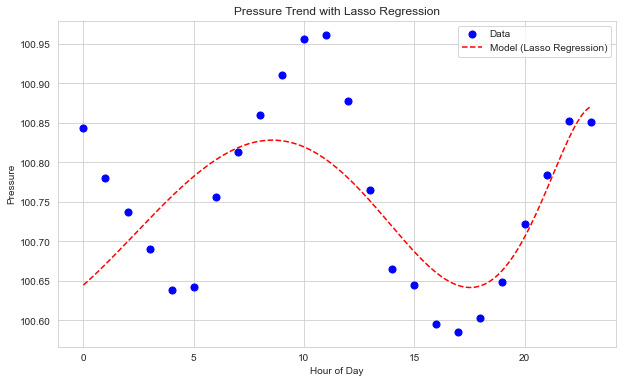

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the data for Sundays for three days and group by hour
sundays_data = df[df['datetime'].dt.dayofweek == 6]  # Assuming Sunday is the day of interest
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Pressure'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Pressure'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Polynomial features
degree = 12  # Degree of the polynomial features
poly = PolynomialFeatures(degree=degree)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

# Lasso regression
alpha = 0.01  # Lasso regularization parameter
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(x_poly_train, y_train)

# Predictions
y_pred_train = lasso_model.predict(x_poly_train)
y_pred_test = lasso_model.predict(x_poly_test)

# Evaluation metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

# Plot the results
plt.figure(figsize=(10, 6))

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred_range = lasso_model.predict(x_range_poly)

plt.scatter(x, y, c='blue', label='Data', s=50)
plt.plot(x_range, y_pred_range, linestyle='dashed', color='red', label='Model (Lasso Regression)')
plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend with Lasso Regression')
plt.legend()
plt.grid(True)

plt.show()


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	0.0127	0.0970	0.0000	0.1128
2	0.0127	0.0970	0.0000	0.1128
3	0.0127	0.0970	0.0000	0.1128
4	0.0127	0.0970	0.0000	0.1128
5	0.0093	0.0798	0.2676	0.0966
6	0.0089	0.0792	0.3024	0.0942
7	0.0089	0.0807	0.2987	0.0945
8	0.0127	0.0970	0.0000	0.1128
9	0.0127	0.0970	0.0000	0.1128
10	0.0127	0.0970	0.0000	0.1128
11	0.0127	0.0970	0.0000	0.1128
12	0.0127	0.0970	0.0000	0.1128
13	0.0127	0.0970	0.0000	0.1128
14	0.0127	0.0970	0.0000	0.1128
15	0.0127	0.0970	0.0000	0.1128
16	0.0127	0.0970	0.0000	0.1128
17	0.0127	0.0970	0.0000	0.1128
18	0.0127	0.0970	0.0000	0.1128
19	0.0127	0.0970	0.0000	0.1128
20	0.0127	0.0970	0.0000	0.1128
21	0.0127	0.0970	0.0000	0.1128
22	0.0127	0.0970	0.0000	0.1128
23	0.0127	0.0970	0.0000	0.1128
24	0.0127	0.0970	0.0000	0.1128
25	0.0127	0.0970	0.0000	0.1128
26	0.0127	0.0970	0.0000	0.1128
27	0.0127	0.0970	0.0000	0.1128
28	0.0127	0.0970	0.0000	0.1128
29	0.0127	0.0970	0.0000	0.1128
30	0.0127	0.0970	0.0000	0.1128
31	0.0127	0.0970	0.0000	0.1128
32	0.0

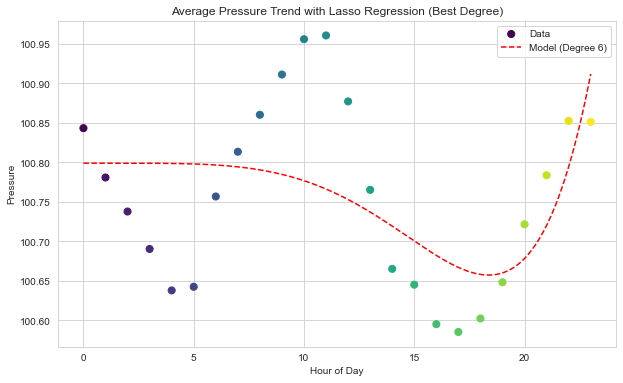

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the data for Sundays for three days and group by hour
sundays_data = df[df['datetime'].dt.dayofweek == 6]  # Assuming Sunday is the day of interest
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Pressure'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Pressure'].values

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    poly_features = PolynomialFeatures(degree=n)
    x_poly = poly_features.fit_transform(x)

    # Lasso regression with cross-validated alpha selection
    lasso_model = LassoCV(cv=5)
    lasso_model.fit(x_poly, y)

    y_pred = lasso_model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

# Print evaluation metrics and best degree
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")

# Fit the model with the best degree
poly_features = PolynomialFeatures(degree=best_n)
x_poly = poly_features.fit_transform(x)

# Lasso regression with the best degree
lasso_model = LassoCV(cv=5)
lasso_model.fit(x_poly, y)

# Print the model parameters
print("Model Parameters:")
print("Intercept:", lasso_model.intercept_)
print("Coefficients:", lasso_model.coef_)

# Create a color map
cmap = plt.get_cmap('viridis', len(sundays_data_grouped))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=range(len(sundays_data_grouped)), cmap=cmap, label='Data', s=50)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

y_pred = lasso_model.predict(x_range_poly)
plt.plot(x_range, y_pred, linestyle='dashed', color='red', label=f'Model (Degree {best_n})')

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Average Pressure Trend with Lasso Regression (Best Degree)')
plt.legend()
plt.grid(True)

plt.show()


Best degree: 50


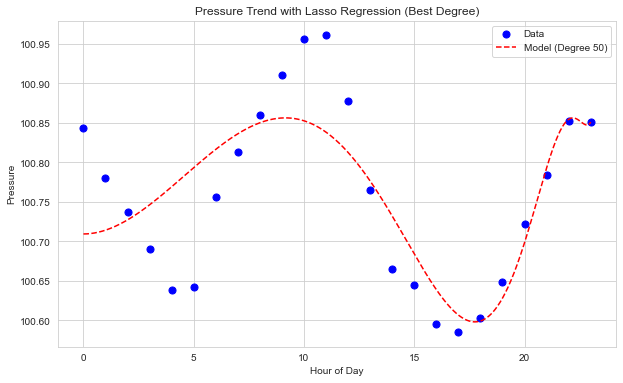

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the data for Sundays for three days and group by hour
sundays_data = df[df['datetime'].dt.dayofweek == 6]  # Assuming Sunday is the day of interest
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Pressure'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Pressure'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

# Polynomial degrees to try
degrees = range(1, 51)

for degree in degrees:
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Lasso regression
    alpha = 0.01  # Lasso regularization parameter
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_poly, y)

    # Predictions
    y_pred = lasso_model.predict(x_poly)

    # Evaluation metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    rmse_list.append(rmse)

# Find the best degree based on test MSE
best_degree_index = np.argmin(mse_list)
best_degree = degrees[best_degree_index]

print("Best degree:", best_degree)

# Plot the results for the best degree
plt.figure(figsize=(10, 6))

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = PolynomialFeatures(degree=best_degree).fit_transform(x_range)
y_pred_range = lasso_model.predict(x_range_poly)

plt.scatter(x, y, c='blue', label='Data', s=50)
plt.plot(x_range, y_pred_range, linestyle='dashed', color='red', label=f'Model (Degree {best_degree})')
plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend with Lasso Regression (Best Degree)')
plt.legend()
plt.grid(True)

plt.show()


Best degree: 99
Evaluation Metrics:
Degree	MSE		MAE		R^2		RMSE
50	0.0047	0.0511	0.6331	0.0683
51	0.0047	0.0511	0.6333	0.0683
52	0.0047	0.0511	0.6335	0.0683
53	0.0047	0.0511	0.6337	0.0683
54	0.0047	0.0511	0.6339	0.0683
55	0.0047	0.0511	0.6341	0.0683
56	0.0047	0.0511	0.6342	0.0682
57	0.0047	0.0511	0.6344	0.0682
58	0.0047	0.0511	0.6345	0.0682
59	0.0047	0.0511	0.6346	0.0682
60	0.0047	0.0511	0.6347	0.0682
61	0.0047	0.0511	0.6348	0.0682
62	0.0046	0.0511	0.6349	0.0682
63	0.0046	0.0511	0.6349	0.0682
64	0.0046	0.0511	0.6350	0.0682
65	0.0046	0.0511	0.6351	0.0682
66	0.0046	0.0511	0.6351	0.0682
67	0.0046	0.0512	0.6352	0.0682
68	0.0046	0.0512	0.6352	0.0682
69	0.0046	0.0512	0.6352	0.0681
70	0.0046	0.0512	0.6353	0.0681
71	0.0046	0.0512	0.6353	0.0681
72	0.0046	0.0512	0.6353	0.0681
73	0.0046	0.0512	0.6354	0.0681
74	0.0046	0.0512	0.6354	0.0681
75	0.0046	0.0512	0.6354	0.0681
76	0.0046	0.0512	0.6354	0.0681
77	0.0046	0.0512	0.6354	0.0681
78	0.0046	0.0512	0.6355	0.0681
79	0.0046	0.0513	0.6355	0.0681
80	0.00

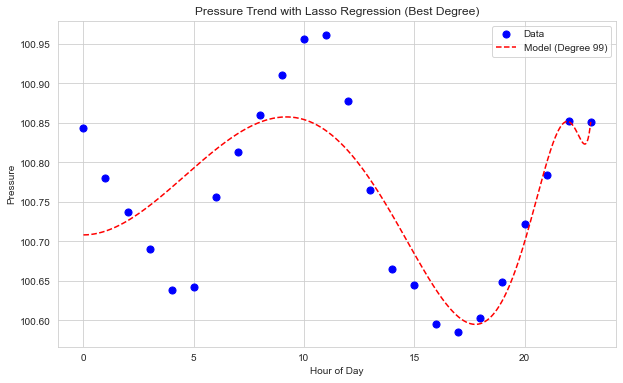

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the data for Sundays for three days and group by hour
sundays_data = df[df['datetime'].dt.dayofweek == 6]  # Assuming Sunday is the day of interest
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Pressure'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Pressure'].values

# Lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

# Polynomial degrees to try
degrees = range(50, 100)

for degree in degrees:
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Lasso regression
    alpha = 0.01  # Lasso regularization parameter
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_poly, y)

    # Predictions
    y_pred = lasso_model.predict(x_poly)

    # Evaluation metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    rmse_list.append(rmse)

# Find the best degree based on test MSE
best_degree_index = np.argmin(mse_list)
best_degree = degrees[best_degree_index]

print("Best degree:", best_degree)

# Print evaluation metrics for all degrees
print("Evaluation Metrics:")
print(f"Degree\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, degree in enumerate(degrees):
    print(f"{degree}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

# Plot the results for the best degree
plt.figure(figsize=(10, 6))

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = PolynomialFeatures(degree=best_degree).fit_transform(x_range)
y_pred_range = lasso_model.predict(x_range_poly)

plt.scatter(x, y, c='blue', label='Data', s=50)
plt.plot(x_range, y_pred_range, linestyle='dashed', color='red', label=f'Model (Degree {best_degree})')
plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend with Lasso Regression (Best Degree)')
plt.legend()
plt.grid(True)

plt.show()


In [32]:
# Fit the model with the best degree
poly = PolynomialFeatures(degree=best_degree)
x_poly = poly.fit_transform(x)

lasso_model = Lasso(alpha=alpha)  # Reinitialize Lasso model for the best degree
lasso_model.fit(x_poly, y)

# Print the model parameters (coefficients)
print("Model Parameters (Coefficients):")
print(lasso_model.coef_)

# Generate the equation of the model
poly_feature_names = poly.get_feature_names(['ticks'])  # Assuming 'Hour' is the feature name
equation_parts = [f"{coef:.2f}*{feature}" for coef, feature in zip(lasso_model.coef_, poly_feature_names)]
equation = " + ".join(equation_parts)
print("\nEquation of the model:")
print("y =", equation)


Model Parameters (Coefficients):
[ 0.00000000e+000 -0.00000000e+000  5.16092470e-003 -3.29094531e-004
 -5.66637604e-006  4.08611304e-008  6.74863761e-009  3.20361637e-010
  1.15743645e-011  3.58710452e-013  9.66031315e-015  2.10843786e-016
  2.42870646e-018 -9.67544981e-020 -9.85725747e-021 -5.71426433e-022
 -2.78425059e-023 -1.24436822e-024 -5.27941827e-026 -2.16270901e-027
 -8.63631011e-029 -3.38124277e-030 -1.30257066e-031 -4.94841775e-033
 -1.85617575e-034 -6.87832947e-036 -2.51764203e-037 -9.09481083e-039
 -3.23724649e-040 -1.13231419e-041 -3.87519197e-043 -1.28859244e-044
 -4.11369602e-046 -1.23261315e-047 -3.29596876e-049 -6.72149910e-051
 -1.35109619e-053  9.54845971e-054  7.80702182e-055  4.70009484e-056
  2.50457750e-057  1.24944322e-058  5.98095539e-060  2.78341715e-061
  1.26916782e-062  5.69859538e-064  2.52817765e-065  1.11095118e-066
  4.84405859e-068  2.09865971e-069  9.04381703e-071  3.87973154e-072
  1.65799682e-073  7.06213213e-075  2.99953885e-076  1.27087650e-077
 